##Importing Libraries

In [ ]:
import nltk
nltk.download('stopwords')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import nltk
nltk.download('all')

##Uploading Files

In [4]:
import json 
import numpy as np
import csv 
from google.colab import files
uploaded = files.upload()

Saving ver1_scrapedweb-1070.json to ver1_scrapedweb-1070.json
Saving ver1_scrapedweb-107.json to ver1_scrapedweb-107.json
Saving ver1_scrapedweb-1068.json to ver1_scrapedweb-1068.json
Saving ver1_scrapedweb-1065.json to ver1_scrapedweb-1065.json
Saving ver1_scrapedweb-1063.json to ver1_scrapedweb-1063.json
Saving ver1_scrapedweb-1037.json to ver1_scrapedweb-1037.json
Saving ver1_scrapedweb-1036.json to ver1_scrapedweb-1036.json
Saving ver1_scrapedweb-1035.json to ver1_scrapedweb-1035.json
Saving ver1_scrapedweb-1034.json to ver1_scrapedweb-1034.json
Saving ver1_scrapedweb-1033.json to ver1_scrapedweb-1033.json
Saving ver1_scrapedweb-1032.json to ver1_scrapedweb-1032.json
Saving ver1_scrapedweb-1031.json to ver1_scrapedweb-1031.json
Saving ver1_scrapedweb-1030.json to ver1_scrapedweb-1030.json
Saving ver1_scrapedweb-1025.json to ver1_scrapedweb-1025.json
Saving ver1_scrapedweb-1026.json to ver1_scrapedweb-1026.json
Saving ver1_scrapedweb-1027.json to ver1_scrapedweb-1027.json
Saving ver

In [10]:
name_list = ["ver1_scrapedweb-107.json", "ver1_scrapedweb-1023.json", "ver1_scrapedweb-1024.json", 
             "ver1_scrapedweb-1025.json", "ver1_scrapedweb-1026.json", "ver1_scrapedweb-1027.json", 
             "ver1_scrapedweb-1030.json", "ver1_scrapedweb-1031.json", "ver1_scrapedweb-1032.json", 
             "ver1_scrapedweb-1033.json", "ver1_scrapedweb-1034.json", "ver1_scrapedweb-1035.json",
             "ver1_scrapedweb-1036.json", "ver1_scrapedweb-1037.json", "ver1_scrapedweb-1063.json", 
             "ver1_scrapedweb-1068.json", "ver1_scrapedweb-1070.json"]

In [6]:
data_list=[]
for i in name_list:
  data_list.append(uploaded[i].decode("utf-8"))
data_list

['{"text": ["Easy Halloween Painting | Adorable Witch Sisters In The Woods | #Lovefallart #Painting | The Art Sherpa", "canvas painting for beginners videos", " ", " ", " BEGINNER HOW TO PAINT art lesson \\" Adorable Witch Sisters in the woods \\" with a black cat in acrylic art tutorial. Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson . Full painting : ", "http://bit.ly/1RxdK2F", " traceable ", "http://bit.ly/22sgTCT", " The Creative Art Collaborations Presents Love a love of autumn and fall video art festival. Just use the hashtag to get your ticket for a sea of amazing creativity. Tons of artists have created art and craft videos for your fall viewing enjoyment ", "#lovefallart", " ", "#painting", " ", "#creativeartscollaboration", " Great for a private at HOME PAINTING PARTY with friends and family. This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours. This is a lot of fun and all

In [11]:
import pandas as pd
df = pd.DataFrame(zip(data_list, data_list),
               columns =['Raw_Text', 'Processed_Text'])
df.head(17)

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","{""text"": [""Easy Halloween Painting | Adorable ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","{""text"": [""Unedited Photos That Show Just How ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","{""text"": [""Art | Thiel College"", ""Thiel Colleg..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","{""text"": ["" Watch Shrek Forever After (2010) -..."
5,"{""text"": [""Manual de can\u00e7\u00f5es de 28 A...","{""text"": [""Manual de can\u00e7\u00f5es de 28 A..."
6,"{""text"": [""FORCE OF FEELING Chapter 1 - Manhua...","{""text"": [""FORCE OF FEELING Chapter 1 - Manhua..."
7,"{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo...","{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo..."
8,"{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4...","{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4..."
9,"{""text"": [""Friday Funday | Visit Sarasota"", ""I...","{""text"": [""Friday Funday | Visit Sarasota"", ""I..."


##Data Cleansing

In [12]:
import re
append_list = []
for m in df["Processed_Text"]:
  append_list.append(re.sub(r'"', "", m))
df["Processed_Text"] = append_list

for m in range(17):
  df['Processed_Text'].values[m] = (re.sub(r"\W", " ", df['Processed_Text'].values[m]))

In [16]:
for m in range(17):
  df['Processed_Text'].values[m] = (re.sub(r" n ", " ", df['Processed_Text'].values[m]))

for m in range(17):
  df['Processed_Text'].values[m] = (re.sub(r" t ", " ", df['Processed_Text'].values[m]))

for m in range(17):
  df['Processed_Text'].values[m] = (re.sub(r" r ", " ", df['Processed_Text'].values[m]))

In [17]:
for i in range(18):
  df["Processed_Text"].replace('\d+', '', regex=True, inplace = True)

for m in range(17):
  df['Processed_Text'].values[m] = " ".join(df['Processed_Text'].values[m].split())

for m in range(17):
  df['Processed_Text'].values[m] = df['Processed_Text'].values[m].split(' ', 1)[1]

df.head(17)

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...",Easy Halloween Painting Adorable Witch Sisters...
1,"{""text"": [""Unedited Photos That Show Just How ...",Unedited Photos That Show Just How Crazy The P...
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...",Watch ABC Watch ABC online Main Navigation Eye...
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...",Art Thiel College Thiel College fine art minor...
4,"{""text"": ["" Watch Shrek Forever After (2010) -...",Watch Shrek Forever After Streaming t Rumpelst...
5,"{""text"": [""Manual de can\u00e7\u00f5es de 28 A...",Manual de can ue ufes de Abr RTP Play RTP MURA...
6,"{""text"": [""FORCE OF FEELING Chapter 1 - Manhua...",FORCE OF FEELING Chapter ManhuaScan Read FORCE...
7,"{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo...",tIdhi Nadhi Movie Pooja Ceremony Image A new f...
8,"{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4...",DOWNLOAD DeJ Loaf Tap In feat Dugg Sada Baby H...
9,"{""text"": [""Friday Funday | Visit Sarasota"", ""I...",Friday Funday Visit Sarasota It us Friday the ...


In [18]:
for m in range(17):
  print(df['Processed_Text'].values[m])
  print()

Easy Halloween Painting Adorable Witch Sisters In The Woods Lovefallart Painting The Art Sherpa canvas painting for beginners videos BEGINNER HOW TO PAINT art lesson Adorable Witch Sisters in the woods with a black cat in acrylic art tutorial Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson Full painting http bit ly RxdKF traceable http bit ly sgTCT The Creative Art Collaborations Presents Love a love of autumn and fall video art festival Just use the hashtag to get your ticket for a sea of amazing creativity Tons of artists have created art and craft videos for your fall viewing enjoyment lovefallart painting creativeartscollaboration Great for a private at HOME PAINTING PARTY with friends and family This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours This is a lot of fun and all you have to do is just believe you have art in your heart Love halloween Love Witches FREE all this will 

##Removal of Stop Words & Tokenizing

In [19]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"ua", "uf", "uf", "u", "uce", "uc", "ub", "ubc", "ucb", "uaTV", "cdq", "The", "For", "ud", "uve", "ure", "uaTV"}
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
for m in range(17):
  text =df['Processed_Text'].values[m]
    #"nlp" Object is used to create documents with linguistic annotations.
  my_doc = nlp(text)

  # Create list of word tokens
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  # Create list of word tokens after removing stopwords
  filtered_sentence =[] 

  for word in token_list:
   lexeme = nlp.vocab[word]
   if lexeme.is_stop == False:
        filtered_sentence.append(word) 
  r = filtered_sentence
  df['Processed_Text'].values[m] = r

##Stemming & Lemmatization

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()
ps = PorterStemmer()


for m in range(17):
  temp1 = []
  temp2 = df['Processed_Text'].values[m]
  for i in temp2:
    temp1.append(lancaster.stem(i))
  df['Processed_Text'].values[m] = temp1 

In [21]:
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()

for m in range(17):
  temp1 = []
  temp2 = df['Processed_Text'].values[m]
  for i in temp2:
    temp1.append(lemmatizer.lemmatize(i))
  df['Processed_Text'].values[m] = temp1 
df.head(17)

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[easy, halloween, paint, ad, witch, sist, wood..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[unedit, photo, crazy, past, hist, dai, sus, s..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[watch, abc, watch, abc, onlin, main, navig, e..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[art, thiel, colleg, thiel, colleg, fin, art, ..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[watch, shrek, forev, streaming, t, rumpelstil..."
5,"{""text"": [""Manual de can\u00e7\u00f5es de 28 A...","[man, de, ue, uf, de, abr, rtp, play, rtp, mur..."
6,"{""text"": [""FORCE OF FEELING Chapter 1 - Manhua...","[forc, feel, chapt, manhuasc, read, forc, feel..."
7,"{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo...","[tidh, nadh, movy, pooj, ceremony, im, new, fi..."
8,"{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4...","[download, dej, loaf, tap, feat, dug, sad, bab..."
9,"{""text"": [""Friday Funday | Visit Sarasota"", ""I...","[friday, funday, visit, sarasot, friday, work,..."


##Bigram Formation

In [22]:
for m in range(17):# Build the bigram and trigram models
  tex = df['Processed_Text'].values[m]
  bigram = gensim.models.Phrases(tex, min_count=5, threshold=100) # higher threshold fewer phrases.
  #trigram = gensim.models.Phrases(bigram[tex], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  #trigram_mod = gensim.models.phrases.Phraser(trigram)

  df['Processed_Text'].values[m] = bigram_mod[tex]

##Building the LDA Model

In [24]:
#def compute_coherence_values(corpus, dictionary, k, a, b):
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df_BoW, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [25]:
# Build LDA model
from gensim.models import CoherenceModel
#for m in range(17):
  #print("Document#", m+1) 
data_lemmatized = df['Processed_Text']
  #data_lemmatized = data_lemmatized.loc[[0==m, 1==m , 2==m, 3==m, 4==m, 5==m, 6==m, 7==m, 8==m, 9==m, 10==m, 11==m, 12==m, 13==m, 14==m, 15==m, 16==m]]
  # Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
  # Create Corpus
texts = data_lemmatized

  # Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
 

[(0,
  '0.034*"new" + 0.025*"abc" + 0.017*"read" + 0.017*"watch" + 0.017*"pooj" + '
  '0.017*"nadh" + 0.017*"navig" + 0.009*"onlin" + 0.009*"view" + 0.009*"main"'),
 (1,
  '0.029*"virt" + 0.025*"pm" + 0.025*"sky" + 0.017*"planet" + 0.017*"antonio" '
  '+ 0.017*"spac" + 0.013*"melody" + 0.013*"brok" + 0.013*"day" + '
  '0.013*"planetar"'),
 (2,
  '0.028*"malibu" + 0.019*"new" + 0.019*"vint" + 0.019*"surfsid" + '
  '0.019*"carpenty" + 0.019*"joan" + 0.019*"germain" + 0.010*"resid" + '
  '0.010*"right" + 0.010*"reserv"'),
 (3,
  '0.022*"noticia" + 0.022*"subnac" + 0.012*"de" + 0.012*"con" + '
  '0.012*"relacionada" + 0.012*"unitel" + 0.003*"art" + 0.002*"paint" + '
  '0.001*"thiel" + 0.001*"stud"'),
 (4,
  '0.002*"art" + 0.001*"cm" + 0.001*"x" + 0.001*"paint" + 0.001*"acryl" + '
  '0.001*"lesson" + 0.001*"thiel" + 0.001*"stud" + 0.001*"begin" + '
  '0.001*"video"'),
 (5,
  '0.002*"paint" + 0.002*"x" + 0.001*"art" + 0.001*"cm" + 0.001*"alb" + '
  '0.001*"feat" + 0.001*"yann" + 0.001*"lesso

##Coherence Score and Perplexity

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.597319282061152

Coherence Score:  0.5201648052691191


##Determining the Optimal Model (No. of Topics)

In [45]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=50, step=1)

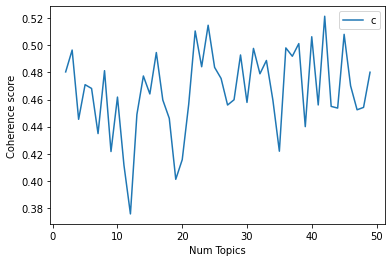

In [30]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4804
Num Topics = 3  has Coherence Value of 0.4965
Num Topics = 4  has Coherence Value of 0.4454
Num Topics = 5  has Coherence Value of 0.471
Num Topics = 6  has Coherence Value of 0.4682
Num Topics = 7  has Coherence Value of 0.4348
Num Topics = 8  has Coherence Value of 0.4813
Num Topics = 9  has Coherence Value of 0.4216
Num Topics = 10  has Coherence Value of 0.4618
Num Topics = 11  has Coherence Value of 0.4115
Num Topics = 12  has Coherence Value of 0.3755
Num Topics = 13  has Coherence Value of 0.4489
Num Topics = 14  has Coherence Value of 0.4774
Num Topics = 15  has Coherence Value of 0.4641
Num Topics = 16  has Coherence Value of 0.4947
Num Topics = 17  has Coherence Value of 0.4597
Num Topics = 18  has Coherence Value of 0.4461
Num Topics = 19  has Coherence Value of 0.4011
Num Topics = 20  has Coherence Value of 0.4156
Num Topics = 21  has Coherence Value of 0.4565
Num Topics = 22  has Coherence Value of 0.5106
Num Topics = 23  has C

In [38]:
# Select the model and print the topics
optimal_model = model_list[21]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(19,
  '0.018*"art" + 0.009*"shrek" + 0.008*"de" + 0.007*"mid" + 0.007*"rul" + 0.007*"streaming" + 0.007*"cameron" + 0.007*"t" + 0.007*"clees" + 0.007*"murph"'),
 (9,
  '0.020*"virt" + 0.017*"pm" + 0.015*"sky" + 0.012*"alb" + 0.011*"planet" + 0.009*"spac" + 0.008*"day" + 0.008*"planetar" + 0.008*"feat" + 0.008*"liv"'),
 (1,
  '0.039*"de" + 0.028*"art" + 0.021*"o" + 0.019*"brok" + 0.019*"chapt" + 0.019*"melody" + 0.016*"m" + 0.016*"ue" + 0.014*"e" + 0.014*"da"'),
 (8,
  '0.024*"lik" + 0.022*"film" + 0.016*"work" + 0.010*"baby" + 0.009*"hist" + 0.009*"s" + 0.009*"mak" + 0.008*"rol" + 0.008*"div" + 0.008*"alb"'),
 (21,
  '0.028*"friday" + 0.016*"art" + 0.013*"night" + 0.013*"sarasot" + 0.011*"alb" + 0.009*"mu" + 0.009*"feat" + 0.009*"ev" + 0.007*"yann" + 0.007*"paint"'),
 (12,
  '0.026*"friday" + 0.023*"art" + 0.014*"ev" + 0.012*"sarasot" + 0.010*"night" + 0.009*"pm" + 0.008*"work" + 0.008*"thiel" + 0.007*"uatv" + 0.007*"mu"'),
 (14,
  '0.034*"new" + 0.022*"pooj" + 0.022*"read" + 0.022*"

In [39]:
# Compute Perplexity
print('\nPerplexity: ', optimal_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimal_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.315555175301098

Coherence Score:  0.4842168495269003


In [ ]:
##Somehow the Coherence Score worsened, so we'll be using the original model for further applications

##Determining Topic Distribution

In [49]:
dist_list = []
for i in range(17):
  text = listq[i]
  dist_list.append(lda_model[id2word.doc2bow(text)])
  print("Document#", i+1)
  print(lda_model[id2word.doc2bow(text)])
  print()

Document# 1
([(8, 0.99919516)], [(0, [8]), (1, [8]), (2, [8]), (3, [8]), (4, [8]), (5, [8]), (6, [8]), (7, [8]), (8, [8]), (9, [8]), (10, [8]), (11, [8]), (12, [8]), (13, [8]), (14, [8]), (15, [8]), (16, [8]), (17, [8]), (18, [8]), (19, [8]), (20, [8]), (21, [8]), (22, [8]), (23, [8]), (24, [8]), (25, [8]), (26, [8]), (27, [8]), (28, [8]), (29, [8]), (30, [8]), (31, [8]), (32, [8]), (33, [8]), (34, [8]), (35, [8]), (36, [8]), (37, [8]), (38, [8]), (39, [8]), (40, [8]), (41, [8]), (42, [8]), (43, [8]), (44, [8]), (45, [8]), (46, [8]), (47, [8]), (48, [8]), (49, [8]), (50, [8]), (51, [8]), (52, [8]), (53, [8]), (54, [8]), (55, [8]), (56, [8]), (57, [8]), (58, [8]), (59, [8]), (60, [8]), (61, [8]), (62, [8]), (63, [8]), (64, [8]), (65, [8]), (66, [8]), (67, [8]), (68, [8]), (69, [8]), (70, [8]), (71, [8]), (72, [8]), (73, [8]), (74, [8]), (75, [8]), (76, [8]), (77, [8]), (78, [8]), (79, [8]), (80, [8]), (81, [8]), (82, [8]), (83, [8]), (84, [8]), (85, [8]), (86, [8]), (87, [8]), (88, [8])

##Intertopic Distance Map

In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.074286  0.134401       1        1  34.864306
21    -0.061098  0.014492       2        1  19.086945
16    -0.052422  0.052938       3        1  18.712413
1      0.204292 -0.121210       4        1   6.427028
20    -0.002391  0.113801       5        1   4.808255
13    -0.115762 -0.152882       6        1   4.621007
8     -0.029834  0.007031       7        1   3.965652
19     0.090818 -0.049467       8        1   2.467848
15     0.114110  0.034671       9        1   1.204670
14    -0.057491 -0.024873      10        1   1.064437
22     0.013201 -0.012265      11        1   0.977177
5      0.002981 -0.016508      12        1   0.760732
10    -0.056506  0.040896      13        1   0.690881
12     0.018091 -0.032298      14        1   0.055932
18    -0.038008 -0.015138      15        1   0.032524
17    -0.024046  0.027946      16        1   0.032524
0      0.094209 -0.022345      17        1   0.032524
9     -0.084422 -0.059798      18        1   0.032524
7     -0.023540 -0.000690      19        1   0.032524
4     -0.006902  0.005383      20        1   0.032524
3      0.000337  0.074888      21        1   0.032524
2     -0.050192 -0.014682      22        1   0.032524
11    -0.009711  0.015711      23        1   0.032524, topic_info=       Term       Freq      Total Category  logprob  loglift
6       art  63.000000  63.000000  Default  30.0000  30.0000
145   paint  41.000000  41.000000  Default  29.0000  29.0000
239       x  31.000000  31.000000  Default  28.0000  28.0000
35       cm  29.000000  29.000000  Default  27.0000  27.0000
764  friday  17.000000  17.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
827      pm   0.002918   8.869299  Topic23  -5.4727   0.0114
120     liv   0.002634   6.626915  Topic23  -5.5749   0.2007
116  lesson   0.003187  14.521103  Topic23  -5.3843  -0.3932
813   night   0.002917  10.645882  Topic23  -5.4730  -0.1715
147   party   0.002697   8.033512  Topic23  -5.5514   0.0317

[1285 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
703       2  0.532306   abound
427       4  0.588181      abr
242       1  0.730334  accompl
242       7  0.365167  accompl
1         1  0.673449    acryl
...     ...       ...      ...
239       5  0.062645        x
695       1  0.175492     yann
695       2  0.263237     yann
695       3  0.438729     yann
695       7  0.087746     yann

[614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 22, 17, 2, 21, 14, 9, 20, 16, 15, 23, 6, 11, 13, 19, 18, 1, 10, 8, 5, 4, 3, 12])

##Word Cloud

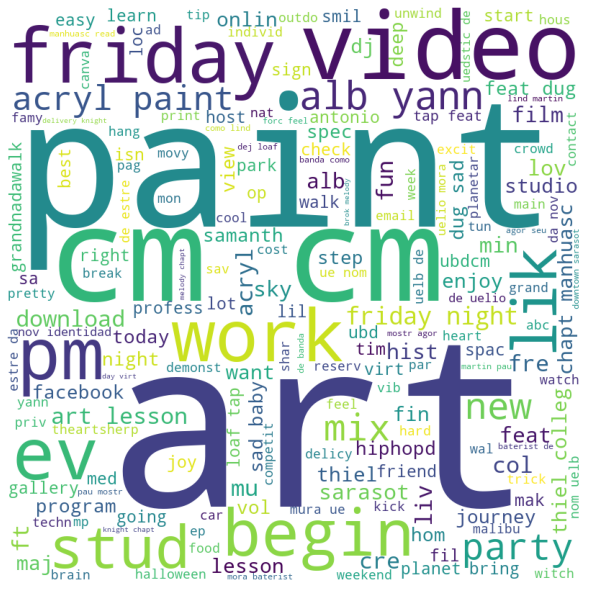

In [47]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
comment_words += " ".join(flat_list)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##Text Distribution (Frequency of each word)

In [48]:
count = 0
word_c = 0
for k, v in id2word.iteritems():
  print(k, v, id2word.dfs[k])
  count+=1
  word_c+=id2word.dfs[k] 
  if count>2136:
    break

0 access 2
1 acryl 1
2 act 1
3 ad 1
4 amaz 1
5 apron 1
6 art 4
7 artsherp 1
8 artwork 1
9 assort 1
10 attribut 1
11 autumn 1
12 bank 1
13 begin 2
14 believ 1
15 bev 1
16 big 2
17 bit 1
18 black 1
19 blu 1
20 body 1
21 brain 2
22 break 3
23 bright 1
24 bring 3
25 brush 1
26 cadm 1
27 canva 1
28 car 2
29 cat 1
30 chalk 1
31 channel 1
32 char 1
33 church 1
34 cinnamoncooney 1
35 cm 1
36 col 3
37 collab 1
38 com 6
39 commerc 1
40 comput 1
41 contact 2
42 convert 1
43 cop 1
44 cost 2
45 craft 1
46 cre 2
47 creativeartscollab 1
48 cup 1
49 deal 1
50 delicy 2
51 der 1
52 deserv 1
53 design 1
54 detail 1
55 easel 1
56 easy 1
57 ebony 1
58 elbow 2
59 enjoy 2
60 environ 1
61 etsy 1
62 excit 2
63 exempt 1
64 facebook 2
65 facil 1
66 fal 1
67 famy 2
68 feel 3
69 fest 2
70 fib 1
71 fil 3
72 filbert 1
73 fin 4
74 find 1
75 flick 1
76 follow 1
77 forward 1
78 fre 2
79 friend 2
80 ful 1
81 fun 1
82 gallery 2
83 gen 1
84 gesso 1
85 giv 2
86 gold 1
87 gre 2
88 greas 1
89 green 2
90 guid 1
91 halloween 1

##Final Output

In [51]:
df = pd.DataFrame(zip(name_list, df['Processed_Text'], dist_list),
               columns =['Web_Page_File', 'Tokenized_Text', 'Topic Distribution'])

In [53]:
df.head(17)

,Web_Page_File,Tokenized_Text,Topic Distribution
0,ver1_scrapedweb-107.json,"[easy, halloween, paint, ad, witch, sist, wood...","([(8, 0.99919516)], [(0, [8]), (1, [8]), (2, [..."
1,ver1_scrapedweb-1023.json,"[unedit, photo, crazy, past, hist, dai, sus, s...","([(7, 0.99489063)], [(68, [7]), (118, [7]), (1..."
2,ver1_scrapedweb-1024.json,"[watch, abc, watch, abc, onlin, main, navig, e...","([(0, 0.9718523)], [(22, [0]), (138, [0]), (14..."
3,ver1_scrapedweb-1025.json,"[art, thiel, colleg, thiel, colleg, fin, art, ...","([(9, 0.9978521)], [(0, [9]), (6, [9]), (28, [..."
4,ver1_scrapedweb-1026.json,"[watch, shrek, forev, streaming, t, rumpelstil...","([(1, 0.9921701)], [(171, [1]), (194, [1]), (2..."
5,ver1_scrapedweb-1027.json,"[man, de, ue, uf, de, abr, rtp, play, rtp, mur...","([(8, 0.9965879)], [(6, [8]), (258, [8]), (329..."
6,ver1_scrapedweb-1030.json,"[forc, feel, chapt, manhuasc, read, forc, feel...","([(7, 0.4578396), (11, 0.51491004)], [(38, [11..."
7,ver1_scrapedweb-1031.json,"[tidh, nadh, movy, pooj, ceremony, im, new, fi...","([(0, 0.98144305)], [(138, [0]), (227, [0]), (..."
8,ver1_scrapedweb-1032.json,"[download, dej, loaf, tap, feat, dug, sad, bab...","([(6, 0.99891466)], [(16, [6]), (24, [6]), (36..."
9,ver1_scrapedweb-1033.json,"[friday, funday, visit, sarasot, friday, work,...","([(6, 0.9989359)], [(6, [6]), (13, [6]), (21, ..."
